## Nama : Naufalia Alfiryal

## NIM : M0501241074

### Import Package

In [33]:
#pip install emoji

In [34]:
#pip install textblob

In [35]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
import emoji
from textblob import Word
from textblob import TextBlob

In [36]:
# Download NLTK resources
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Import Dataset

In [37]:
df = pd.read_excel('English_Reviews_Skincare.xlsx')
df

,No,Review
0,1,OMG!!! I absolutely love this cream 😍😍✨✨ My sk...
1,2,Buy it here ➡️ [www.skincarebest.com](http://w...
2,3,Terrible... terrible... terrible... 😡😡😡 Been u...
3,4,I tried this product & the result? <b>WOW</b>....
4,5,"😏😏 Seriously, I don’t understand... I’ve been ..."
5,6,This serum really makes my skin smooth!!! I SW...
6,7,"People say this product is good, but in my opi..."
7,8,"It’s good, but the price is WAY TOO EXPENSIVE!..."
8,9,🥰🥰 Is this product really good? Or is it just ...
9,10,good good good good good good good good good g...


### Text Cleaning

Text Cleaning terdiri dari beberapa tahapan yakni, removing URLs, removing punctuation and special characters, removing numbers, expanding contractions, converting to lowercase, handling emojis, correcting words, dan removing extra whitespaces.

In [38]:
def clean_text(text):
    if isinstance(text, str):
        # Removing URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        
        # Removing Punctuation and Special Characters
        text = text.translate(str.maketrans('', '', string.punctuation))
        
        # Removing Numbers
        text = re.sub(r'\d+', '', text)
        
        # Converting to Lowercase
        text = text.lower()
        
        # Handling Emojis (Removing them)
        text = emoji.replace_emoji(text, replace='')
        
        # Removing Repeated Words
        text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)
        
        # Correcting Words (Exclude Specific Terms) #hal ini dilakukan karna kata "omg" terus berubah menjadi "org"
        exceptions = ["omg", "lol", "wow"]
        text = " ".join(
            [word if word in exceptions else str(TextBlob(word).correct()) for word in text.split()]
        )
        
        # Removing Extra Whitespaces
        text = re.sub(r'\s+', ' ', text).strip()

        return text
    return ''

In [39]:
# Apply Text Cleaning
df['cleaned_review'] = df['Review'].apply(clean_text)
print("Setelah Text Cleaning:\n", df[['Review', 'cleaned_review']].head())

Setelah Text Cleaning:
                                               Review  \
0  OMG!!! I absolutely love this cream 😍😍✨✨ My sk...   
1  Buy it here ➡️ [www.skincarebest.com](http://w...   
2  Terrible... terrible... terrible... 😡😡😡 Been u...   
3  I tried this product & the result? <b>WOW</b>....   
4  😏😏 Seriously, I don’t understand... I’ve been ...   

                                      cleaned_review  
0  omg i absolutely love this cream my skin insta...  
1                           buy it here big discount  
2  terrible been using it for weeks and my acne g...  
3  i tried this product the result blow love it b...  
4  seriously i don’t understand i’ve been using i...  


### Tokenization

Tokenization merupakan proses membagi teks panjang, seperti paragraf atau kalimat, menjadi unit-unit yang lebih kecil dan lebih mudah dikelola serta diproses. 

In [40]:
df['tokens'] = df['cleaned_review'].apply(word_tokenize)
print("\nSetelah Tokenization:\n", df[['cleaned_review', 'tokens']].head())


Setelah Tokenization:
                                       cleaned_review  \
0  omg i absolutely love this cream my skin insta...   
1                           buy it here big discount   
2  terrible been using it for weeks and my acne g...   
3  i tried this product the result blow love it b...   
4  seriously i don’t understand i’ve been using i...   

                                              tokens  
0  [omg, i, absolutely, love, this, cream, my, sk...  
1                     [buy, it, here, big, discount]  
2  [terrible, been, using, it, for, weeks, and, m...  
3  [i, tried, this, product, the, result, blow, l...  
4  [seriously, i, don, ’, t, understand, i, ’, ve...  


### Stopwords Removal

Stopwords merupakan kata-kata yang sering muncul dalam suatu bahasa, tetapi tidak memiliki makna yang signifikan dalam analisis teks. 

Contohnya, seperti "the", "is", "and", dll.

In [41]:
stop_words = set(stopwords.words('english'))
df['tokens_no_stopwords'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
print("\nSetelah Stopwords Removal:\n", df[['tokens', 'tokens_no_stopwords']].head())


Setelah Stopwords Removal:
                                               tokens  \
0  [omg, i, absolutely, love, this, cream, my, sk...   
1                     [buy, it, here, big, discount]   
2  [terrible, been, using, it, for, weeks, and, m...   
3  [i, tried, this, product, the, result, blow, l...   
4  [seriously, i, don, ’, t, understand, i, ’, ve...   

                                 tokens_no_stopwords  
0  [omg, absolutely, love, cream, skin, instantly...  
1                               [buy, big, discount]  
2   [terrible, using, weeks, acne, got, even, worse]  
3  [tried, product, result, blow, love, sadly, co...  
4  [seriously, ’, understand, ’, using, weeks, ha...  


### Lemmatization

Lemmatization adalah proses mengubah bentuk kata menjadi bentuk dasar atau lemma-nya. Berbeda dengan stemming yang hanya memotong akhiran kata untuk mengubahnya menjadi bentuk dasar, lemmatization mempertimbangkan konteks kata dan menggunakan kamus untuk mengubah kata menjadi bentuk dasar yang sebenarnya.

In [42]:
lemmatizer = WordNetLemmatizer()
df['tokens_lemmatized'] = df['tokens_no_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
print("\nSetelah Lemmatization:\n", df[['tokens_no_stopwords', 'tokens_lemmatized']].head())


Setelah Lemmatization:
                                  tokens_no_stopwords  \
0  [omg, absolutely, love, cream, skin, instantly...   
1                               [buy, big, discount]   
2   [terrible, using, weeks, acne, got, even, worse]   
3  [tried, product, result, blow, love, sadly, co...   
4  [seriously, ’, understand, ’, using, weeks, ha...   

                                   tokens_lemmatized  
0  [omg, absolutely, love, cream, skin, instantly...  
1                               [buy, big, discount]  
2    [terrible, using, week, acne, got, even, worse]  
3  [tried, product, result, blow, love, sadly, co...  
4  [seriously, ’, understand, ’, using, week, hap...  


### Menyimpan Data Hasil Pre-processing

In [43]:
df.to_excel("Cleaned_Reviews.xlsx", index=False)
print("\nData yang telah melalui tahapan text pre-processing akan disimpan dalam 'Cleaned_Reviews.xlsx'")


Data yang telah melalui tahapan text pre-processing akan disimpan dalam 'Cleaned_Reviews.xlsx'


### Hasil Data Keseluruhan yang Sudah Melalui Tahapan Text Pre-Processing

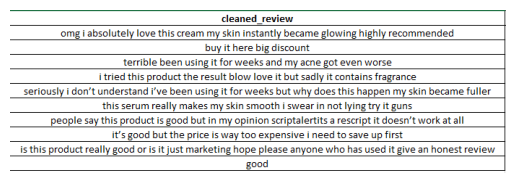

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load dan tampilkan gambar
img = mpimg.imread('Cleaned_Review.png')  # Ganti path dengan lokasi file gambar
plt.imshow(img)
plt.axis('off')  # Sembunyikan axis
plt.show()